<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/C4_Architecture_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C4 Architecture Examples

In [14]:
#@title Install Diagrams
import os
os.system('pip install diagrams')

0

In [15]:
#@markdown ----------------------------------------------
#@markdown ## Attributes

#@markdown + Graph Attributes
global_graph_attr = {
  "splines": "spline",
  "fontsize": "10",
  "bgcolor": "transparent"
}

#@markdown + Node Attributes
global_node_attr = {
  "fontsize": "8px",
  "width": "1.8"#,
  #"height": "1.4"
}


In [ ]:
from urllib import request

baseUrl = "https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/"
request.urlretrieve(baseUrl + 'Repository/Repository.py', '_Repository_.py')

In [16]:
#@title Internet Banking System Context Diagram
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship
from _Repository_ import Personas, Systems

internet_banking_system_settings =  {
  "name": "Internet Banking System Context Diagram",
  "outformat": "png",
  "direction": "TB",
  "graph_attr": global_graph_attr,
  "node_attr": global_node_attr
}

with Diagram(** internet_banking_system_settings) as _internet_banking_system_context_diagram:
  
  #@markdown ----------------------------------------------
  #@markdown ## Personas

  #@markdown + BankingCustomer
  customer = Personas.BankingCustomer.Get()

  #@markdown ----------------------------------------------
  #@markdown ## Context

  #@markdown System: Internet Banking System
  with SystemBoundary("Internet Banking System"):
    #@markdown + WebApp
    webapp = Systems.WebApp.Get()

    #@markdown + SPA
    spa = Systems.SPA.Get()

    #@markdown + MobileApp
    mobileApp = Systems.MobileApp.Get()

    #@markdown + API
    api = Systems.API.Get()

    #@markdown + OracleDB
    database = Systems.OracleDB.Get()

    #@markdown + CustomA
    diagrams = Systems.CustomA.Get()

  #@markdown ----------------------------------------------
  #@markdown ## External Systems   

  #@markdown + Email
  email = Systems.Email.Get()

  #@markdown + Mainframe
  mainframe = Systems.Mainframe.Get()

  #@markdown ----------------------------------------------
  #@markdown ## Relationships
  #@markdown Shown in code
  customer >> Relationship("Visits big.bank.com/ib using [HTTPS]") >> webapp
  customer >> Relationship("Views account balances, and makes payments using") >> [spa, mobileApp]
  webapp >> Relationship("Delivers to the customer's web browser") >> spa
  spa >> Relationship("Make API calls to [JSON/HTTPS]") >> api
  mobileApp >> Relationship("Make API calls to [JSON/HTTPS]") >> api

  api >> Relationship("reads from and writes to") >> database
  api >> Relationship("Sends email using [SMTP]") >> email
  api >> Relationship("Makes API calls to [XML/HTTPS]") >> mainframe
  customer << Relationship("Sends e-mails to") << email


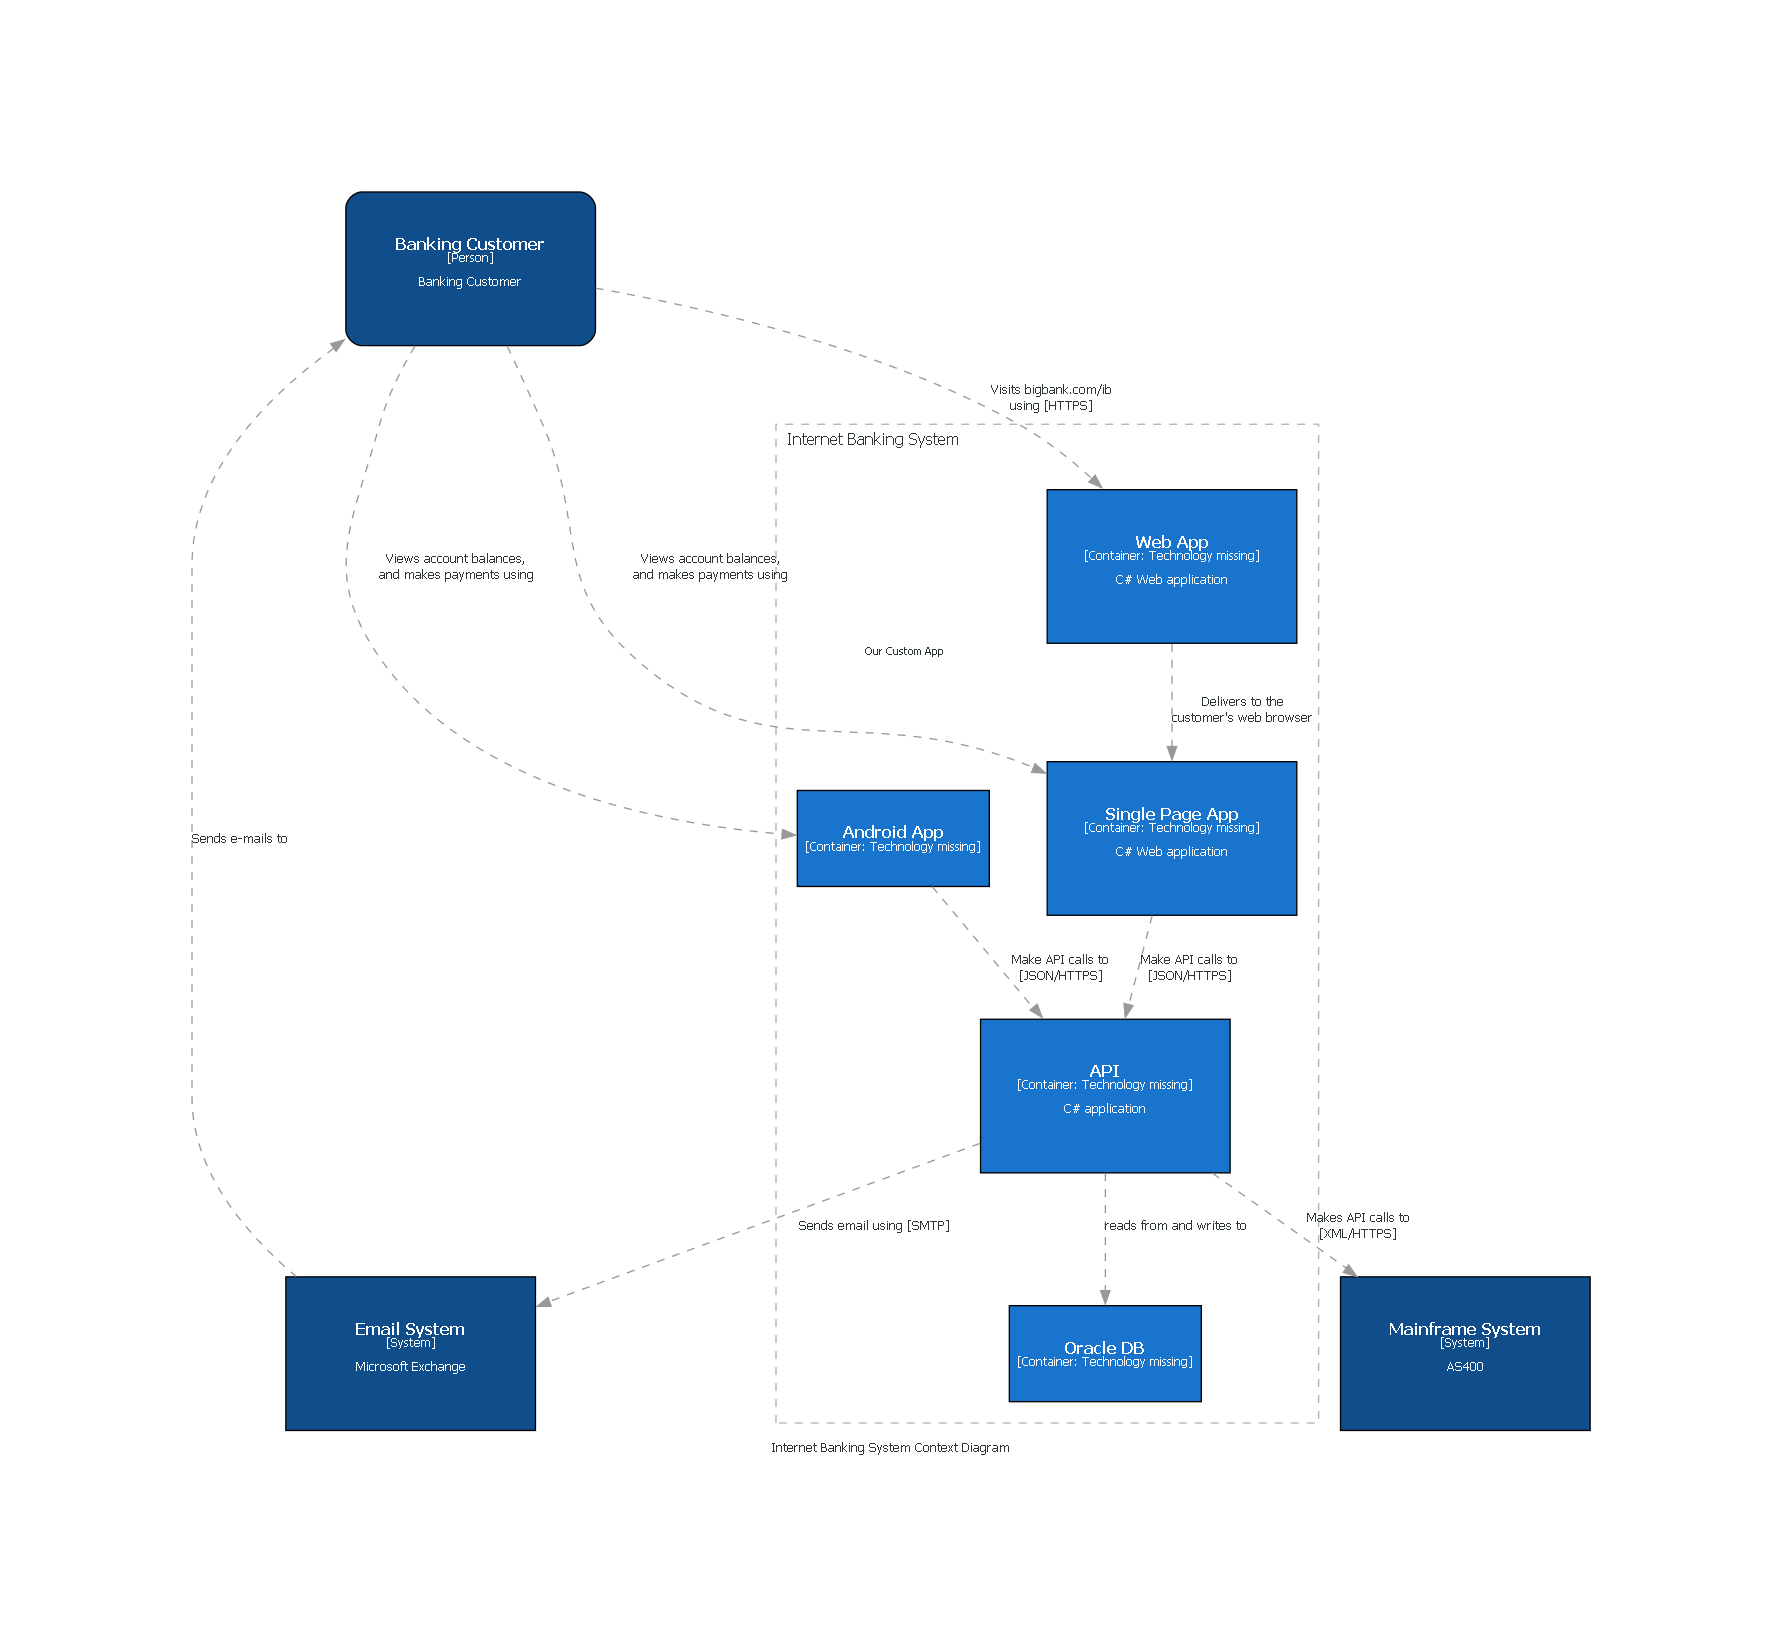

In [17]:
#@title Context Diagram
_internet_banking_system_context_diagram